## 從字庫裡面把字隨機挑出來組成二字詞或三字詞，然後強迫他們滿足powerlaw，之後用這些詞組成文本

In [1]:
import random 
import bisect 
import math 
from functools import reduce
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from count import *
%matplotlib inline

In [2]:
class PowerLawGenerator: 
    """
    PowerLawGenerator is an immutable type representing a power law cumulative distribution
    function with patameters alpha and n. 
    
    Adapted from codes copid form the flollowing online resource:
    
    http://stackoverflow.com/questions/1366984/
    generate-random-numbers-distributed-by-zipf/
    8788662#8788662

    """

    
    def __init__(self, n, alpha): 
        """Initialize a Zipf CDF.
         Paramerters
         n: int 
            n >= 0
         
         alpha: float 
            alpha >= 0
        """
        # Calculate Zeta values from 1 to n: 
        assert n >= 0 and alpha >= 0
        assert int(n) == n 
        self.n = n
        self.alpha = alpha
        tmp = [1. / (math.pow(float(i), alpha)) for i in range(1, n+1)] 
        zeta = reduce(lambda sums, x: sums + [sums[-1] + x], tmp, [0]) 

        # Store the translation map: 
        # Abstract function: representing the cumulative distribution function 
        # of a Zipf pmf 
        self.distMap = [x / zeta[-1] for x in zeta] 

    def next(self): 
        """Yield an integer between 0 and n, with probability governed by 
        Zipf distribution function specified by n and alpha.
        """
        # Take a uniform 0-1 pseudo-random value: 
        u = random.random()  

        # Translate the Zipf variable: 
        return bisect.bisect(self.distMap, u) - 1
    
    def __get_alpha(self):
        ans = self.alpha
        return ans
    
    def __get_n(self):
        ans = self.n
        return ans



In [5]:
def read_file_generate_fake(char_num = 2, out_file =  'fake1.txt', sample_word_num = 8000,
                            num_word_in_fake_scrip = 15000, 
                            alpha = 1.00001, noun = False):
    """Read "roc2.txt" file, and then generate a fake script satisfying Zipfs' law. All the words in 
    the output script share the same lenth char_num
    """
    SAMPLE_WORD_NUM = sample_word_num
    ALPHA = alpha
    NUM_WORD_IN_NOV = num_word_in_fake_scrip
    OUTPUT_FILE_NAME = out_file
    NOUN = noun
    CHAR_NUM = char_num
    
    gau_gen =  PowerLawGenerator(SAMPLE_WORD_NUM,ALPHA)
    f =  open("roc2.txt","r")

    world_list = []
    
    for line in f:
        line_split = line.split("\t")
        if NOUN:
            if 'N' in line_split[4]:
                world_list.append(line_split[3])
        else:
            #if len(line_split[3]) == CHAR_NUM:
                world_list.append(line_split[3])

    f.close()
    
    for item in world_list:
        if item == " ":
            world_list.remove(item)
    #######################################
    ###these codes are optional 
    
    tmp_list = []
    for item in world_list:
        for e in list(item):
            tmp_list.append(e)
    random.shuffle(tmp_list)
    list_2 = []
    tmp = ''
    for e in tmp_list:
        tmp = tmp + e
        if len(tmp) == char_num:
            list_2.append(tmp)
            tmp = ''
    
    world_list = list_2

    print("words in a corpus: " ,len(world_list))
    
    
    #######################################


    print("A corpus is successfully loaded.")
    
    random.shuffle(world_list)
    small_world_list = world_list[-SAMPLE_WORD_NUM:]
    target_string_list = []

    for i in range(NUM_WORD_IN_NOV):
        num = gau_gen.next()
        w = small_world_list[num]
        target_string_list.append(w+" ")
        
    f2 = open(OUTPUT_FILE_NAME , 'w')

    word_count = 0
    for item in target_string_list:
        if word_count < 20:
            f2.write(item)
            word_count += 1
        else:
            word_count = 0
            f2.write(item+"\n")
    f2.close()
    print("A fake script is successfully created !")
    print("--------------------")
    return None

## 改動不同的參數以產生你想要的文本
#### 參數解釋：
* char_num: 假文本裡面每個單詞的字數
* out_file: 輸出的假文本的檔名
* sample_word_num: zipf's law 的參數之一
* num_word_in_fake_scrip: 輸出的假文本總共有多少單詞
* alpha: Zipf's law 的參數之二
* noun: 只選roc2.txt(中研院詞庫)中的名詞與否

In [21]:
read_file_generate_fake(char_num = 2, out_file =  'JAN15FAKEpower.txt', sample_word_num = 8000,
                            num_word_in_fake_scrip = 20000, 
                            alpha = 0.5, noun = False)

words in a corpus:  32439
A corpus is successfully loaded.
A fake script is successfully created !
--------------------


In [22]:
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)
##if anything gets into trouble, use (1) instead of (2), and vise versa.
filename = 'JAN15FAKEpower.txt' #change filename if you want to get statictical information of another
##text file.
big, char, word = main(filename,encode) 

Read file successfully!
Successfully count word freqency!
Successfully count char freqency!
Successfully build data frames!


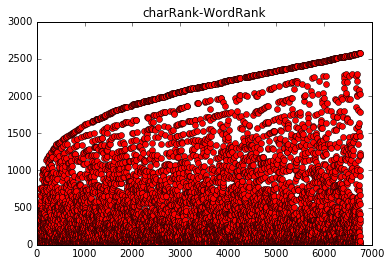

In [23]:
xx = big["0th_char_rank"]
plt.title('charRank-WordRank')
plt.plot(xx,'ro')

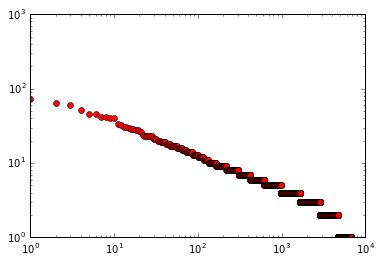

In [24]:
yy = word['wordFreq']
plt.yscale('log')
plt.xscale('log')
plt.plot(yy,'ro')

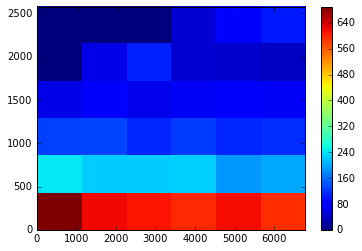

In [25]:
draw_density_plot(big, 6,)

In [26]:
check_const_ratio(word)


wordRank  ratio:  [ 0.68955841  0.62197473  0.57162534  0.58855422  0.63664278  0.68167203
  0.72169811  0.71568627  0.75342466  0.81212121  0.87313433  0.86324786
  0.86138614  0.83908046  0.89041096  0.87692308  0.8245614   0.89361702
  0.85714286  0.91666667  0.90909091  0.96666667  0.79310345]
std=  0.112125160467


array([  6.77100000e+03,   6.89558411e-01,   6.21974727e-01,
         5.71625344e-01,   5.88554217e-01,   6.36642784e-01,
         6.81672026e-01,   7.21698113e-01,   7.15686275e-01,
         7.53424658e-01,   8.12121212e-01,   8.73134328e-01,
         8.63247863e-01,   8.61386139e-01,   8.39080460e-01,
         8.90410959e-01,   8.76923077e-01,   8.24561404e-01,
         8.93617021e-01,   8.57142857e-01,   9.16666667e-01,
         9.09090909e-01,   9.66666667e-01,   7.93103448e-01,
         4.34782609e-02])